In [137]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [138]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [139]:
# Percentual de nulos
df.isna().sum() / df.shape[0]

PassengerId   0.00
Survived      0.00
Pclass        0.00
Name          0.00
Sex           0.00
Age           0.20
SibSp         0.00
Parch         0.00
Ticket        0.00
Fare          0.00
Cabin         0.77
Embarked      0.00
dtype: float64

In [140]:
# Preenchendo idades nulas com a média
idade_media = int(df['Age'].mean())

df.loc[:, 'Age'] = df['Age']. fillna(idade_media)

# Removendo coluna com muitos dados nulos
df.dropna(axis=1, thresh=600, inplace=True)

# Removendo linhas com embarked Nulo
df.dropna(axis=0, subset=['Embarked'], inplace=True)

In [141]:
# Conferindo valores nulos
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [142]:
df.drop(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
5,6,0,3,"Moran, Mr. James",male,29.00,0,0,330877,8.46,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.00,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C


In [143]:
# Removendo colunas que não possuem utilidade
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S


In [144]:
# Encontrando colunas com objects
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Sex
Embarked


In [145]:
# Dummies nas colunas com objects
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,1,0,7.25,False,True,False,False,True
1,1,1,38.00,1,0,71.28,True,False,True,False,False
2,1,3,26.00,0,0,7.92,True,False,False,False,True
3,1,1,35.00,1,0,53.10,True,False,False,False,True
4,0,3,35.00,0,0,8.05,False,True,False,False,True


In [146]:
# Converter Dummies para 0 e 1

colunas_convert = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[colunas_convert] = df[colunas_convert].astype(int)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,1,0,7.25,0,1,0,0,1
1,1,1,38.00,1,0,71.28,1,0,1,0,0
2,1,3,26.00,0,0,7.92,1,0,0,0,1
3,1,1,35.00,1,0,53.10,1,0,0,0,1
4,0,3,35.00,0,0,8.05,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.00,0,1,0,0,1
887,1,1,19.00,0,0,30.00,1,0,0,0,1
888,0,3,29.00,1,2,23.45,1,0,0,0,1
889,1,1,26.00,0,0,30.00,0,1,1,0,0


In [147]:
# Igualando escalas

scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.00,1.00,0.27,0.12,0.00,0.01,0.00,1.00,0.00,0.00,1.00
1,1.00,0.00,0.47,0.12,0.00,0.14,1.00,0.00,1.00,0.00,0.00
2,1.00,1.00,0.32,0.00,0.00,0.02,1.00,0.00,0.00,0.00,1.00
3,1.00,0.00,0.43,0.12,0.00,0.10,1.00,0.00,0.00,0.00,1.00
4,0.00,1.00,0.43,0.00,0.00,0.02,0.00,1.00,0.00,0.00,1.00


In [148]:
# Definindo Target e Features
target = 'Survived'
features = list(df.columns)
features.remove(target)

print('Features: ', features)
print('Target: ', target)

Features:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Target:  Survived


In [149]:
# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape) 
print(y_val.shape)


(711, 10)
(178, 10)
(711,)
(178,)


In [150]:
# Criando modelo de teste com um vizinho
clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [151]:
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print('Acurácia: ', acc)

Acurácia:  0.7584269662921348


In [152]:
# Criando lista com numeros de vizinhos para teste
n_vizinhos = np.arange(1, 11) # Array de 1 a 10

resultados = []

# Para cada numero de vizinhos
for k in n_vizinhos:
    # Criar modelo novo e treinar ele
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    # Predição para dados de validação e calcular acurácia
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)

    # Salvando acurácia para o numero atual de vizinhos
    resultados.append(acc)

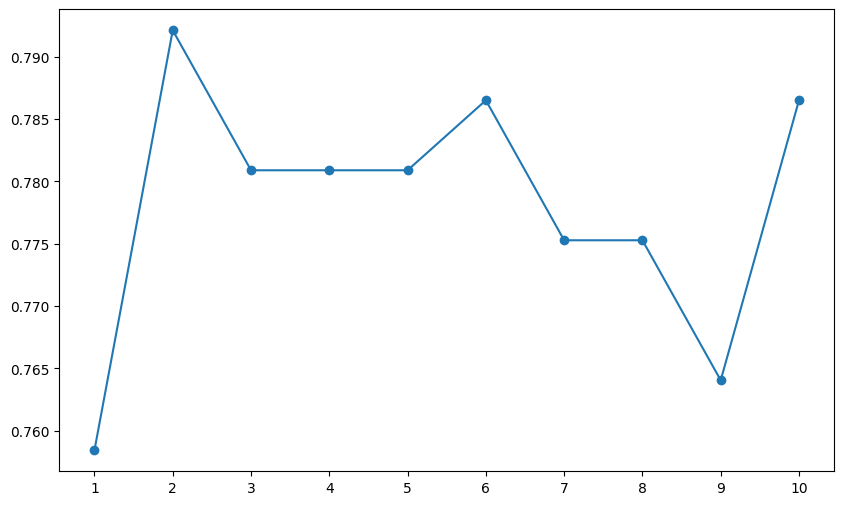

In [153]:
plt.figure(figsize = (10,6))
# No eixo X teremos o número de vizinhos e no eixo Y a acurácia
plt.plot(n_vizinhos, resultados, '-o')

plt.xticks(n_vizinhos);  # Exibir cada numero de vizinhos

In [154]:
# Após a otimização de hiperparâmetro descobrimos o melhor número de vizinhos

# Criando modelo que usa 2 vizinhos 
clf = KNeighborsClassifier(n_neighbors = 2)

# Treinando o modelo nos dados de treino
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [155]:
# Usar o modelo para prever a classe de novos exemplos
y_pred = clf.predict(X_val)

In [156]:
# Função que calcula a acurácia

acc = accuracy_score(y_val, y_pred)

print('Acurácia: ', acc)

Acurácia:  0.7921348314606742
